In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [1]:
from pandas import DataFrame

In [2]:
data = {'stim_type': list(), 
        'amplitude': list(),
        'inter_event_interval': list(),
        'sweep': list()}

In [31]:
root_dir = '/mnt/c/Users/dsege/TEMP/Alexia/2021_12_09_C2/2021_12_09_C2/2021_12_09_C2_20Hz500ms.csv' 

filename = '2021_12_09_C2'

In [32]:
df = pd.read_csv(root_dir)

In [33]:
df

,EV_WaveN_RS1_A0,EV_ThreshT_RS1_A0,EV_ThreshY_RS1_A0,EV_PeakT_RS1_A0,EV_PeakY_RS1_A0,EV_BaseY_RS1_A0,EV_AmpY_RS1_A0
0,0,3441.7,-4.473760,3442.4,-10.65330,-1.331690,-9.32157
1,0,3534.8,-5.068700,3535.8,-9.64638,-1.932240,-7.71414
2,0,3575.0,-4.977810,3575.6,-10.43300,-1.432070,-9.00091
3,0,3607.5,-4.416650,3608.2,-9.70576,-1.292380,-8.41338
4,0,3753.6,-5.167740,3754.4,-17.78960,-1.402520,-16.38710
...,...,...,...,...,...,...,...
816,9,19229.1,-2.210830,19230.3,-3.21420,0.829616,-4.04381
817,9,19369.7,-0.066215,19370.2,-2.55783,3.129000,-5.68683
818,9,19485.4,-1.393950,19487.3,-10.27540,2.042480,-12.31790
819,9,19616.2,-5.867590,19616.8,-8.44465,-2.214410,-6.23025


In [34]:
data['stim_type'] = data['stim_type'] + ['20Hz500ms'] * df.shape[0]

In [35]:
data['sweep'] = data['sweep'] + list(df['EV_WaveN_RS1_A0'].values)

In [36]:
data['inter_event_interval'] = data['inter_event_interval'] + list(df['EV_PeakT_RS1_A0'].rolling(2).apply(np.diff).rolling(3, center=True).mean().values)

In [37]:
data['amplitude'] = data['amplitude'] + list(df['EV_AmpY_RS1_A0'].values)

In [38]:
df_combo = pd.DataFrame(data=data)
df_combo

,stim_type,amplitude,inter_event_interval,sweep
0,Bsl,-10.59030,NaN,0
1,Bsl,-7.38336,NaN,0
2,Bsl,-6.41348,79.216667,0
3,Bsl,-14.53310,87.600000,0
4,Bsl,-5.27158,74.533333,0
...,...,...,...,...
8730,20Hz500ms,-4.04381,344.433333,9
8731,20Hz500ms,-5.68683,212.166667,9
8732,20Hz500ms,-12.31790,128.833333,9
8733,20Hz500ms,-6.23025,202.233333,9


(-30.0, 0.0)

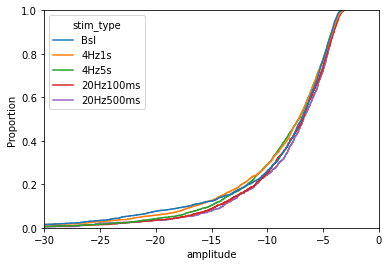

In [39]:
sns.ecdfplot(data=df_combo, x='amplitude', hue='stim_type')
plt.xlim(-30, 0)

In [46]:
df_combo['inter_event_interval'].min()

-11273.550000000003

In [47]:
df_combo[df_combo['inter_event_interval'] < 0]

,stim_type,amplitude,inter_event_interval,sweep
313,Bsl,-4.07756,-11219.933333,0
314,Bsl,-4.72432,-11220.733333,1
315,Bsl,-3.92875,-11217.100000,1
623,Bsl,-6.94587,-11273.550000,1
624,Bsl,-6.12897,-11205.816667,2
...,...,...,...,...
8502,20Hz500ms,-6.91217,-5383.066667,8
8503,20Hz500ms,-8.27262,-5393.600000,8
8622,20Hz500ms,-6.61964,-5529.666667,8
8623,20Hz500ms,-4.71173,-5482.700000,9


(0.0, 500.0)

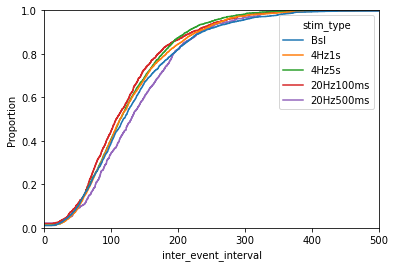

In [45]:
sns.ecdfplot(data=df_combo, x='inter_event_interval', hue='stim_type')
plt.xlim(0, 500)
